# Hexagonal hole hexagonal lattice

## Initial geometry

In [1]:
import meep as mp
from meep import mpb

import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

In [2]:
import sys
sys.path.append("/home/ben/Desktop/Thesis/github/Thesis_name/Simulations/")
from ExternalFunctions import (plot_unit_cell_cross_sections, geom_hexagon_PCS,
                              plot_epsilon_XY, geom_hexagon_PCS_slope, hexagonal_lattice_bands)

In [3]:
save = True
plot = True
simulate = False

In [4]:
resolution = 16
num_bands = 1

From PNAS paper, we know that the unit cell looks like this:

<img src="media/hexagonal_unit_cell.png" width="100">

In [5]:
a = 405 # nm
t = 180 / a
scaling = (1-t)*0.5

In [6]:
sx = 1 
sy = 1 
sz = 10
cell = mp.Vector3(sx, sy, sz)

In [7]:
parameters = [a, t, scaling]
geometry, geometry_lattice = geom_hexagon_PCS (parameters, cell)

-----------
Initializing structure...
time for choose_chunkdivision = 6.91414e-06 s
Working in 3D dimensions.
Computational cell is 1 x 1 x 10 with resolution 16
     block, center = (0,0,0)
          size (1e+20,1e+20,0.444444)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (3.97404,3.97404,3.97404)
     prism, center = (0,0,0)
          height 0.444444, axis (0,0,1), sidewall angle: 0 radians, 6 vertices:
          (0.185185,0.185185,-0.222222)
          (0.37037,-0.185185,-0.222222)
          (0.185185,-0.37037,-0.222222)
          (-0.185185,-0.185185,-0.222222)
          (-0.37037,0.185185,-0.222222)
          (-0.185185,0.37037,-0.222222)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.506171 s
-----------


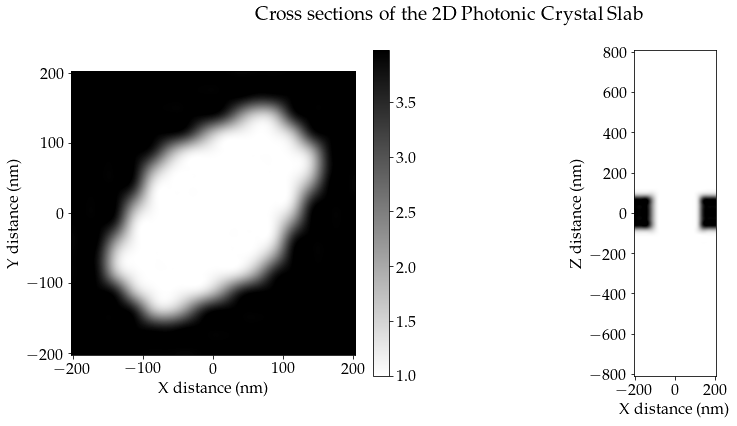

In [8]:
sim_params = resolution, cell, geometry
if plot == True:
    fig,  ax = plot_unit_cell_cross_sections(a, sim_params)

It is distorted because our basis is not square in this case!

In [9]:
num_bands = 1
k_point = mp.Vector3(0.0,0.0,0.0)

sim_params = [geometry_lattice,  k_point, geometry, resolution, num_bands]

num_period = 3

xlim = [-520,520]
ylim = [-520,520]

title = 'XY cross section of 3 unit cells of the PCS'

if plot == True:
    fig, ax = plot_epsilon_XY (sim_params, a, num_period, xlim,  ylim, title, custom_material=False)

Initializing eigensolver data
Computing 1 bands with 1e-07 tolerance
Working in 3 dimensions.
Grid size is 16 x 16 x 160.
Solving for 1 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (0.866025, 0.5, 0)
     (0.866025, -0.5, 0)
     (0, 0, 10)
Cell volume = 8.66025
Reciprocal lattice vectors (/ 2 pi):
     (0.57735, 1, -0)
     (0.57735, -1, 0)
     (-0, 0, 0.1)
Geometric objects:
     block, center = (0,0,0)
          size (1e+20,1e+20,0.444444)
          axes (1,0,0), (0,1,0), (0,0,1)
     prism, center = (0,0,0)
          height 0.444444, axis (0,0,1), sidewall angle: 0 radians, 6 vertices:
          (0.185185,0.185185,-0.222222)
          (0.37037,-0.185185,-0.222222)
          (0.185185,-0.37037,-0.222222)
          (-0.185185,-0.185185,-0.222222)
          (-0.37037,0.185185,-0.222222)
          (-0.185185,0.37037,-0.222222)
Geometric object tree has depth 1 and 10 object nodes (vs. 2 actual objects)
Initializing epsilon function...
Allocating fiel

As we can see, rectifying th basis yields the correct crystal!

## Geometry with fabrication slope

In [10]:
dielec_const = 1.9935
alpha = 7.9 * np.pi / 180
params = dielec_const, t, alpha, geometry_lattice

custom_material = True

In [11]:
eps_func = geom_hexagon_PCS_slope(params)
default_material = eps_func

In [12]:
sim_params = resolution, cell, default_material

fig, ax = plot_unit_cell_cross_sections(a, sim_params, custom_material = True)

-----------
Initializing structure...
time for choose_chunkdivision = 1.40667e-05 s
Working in 3D dimensions.
Computational cell is 1 x 1 x 10 with resolution 16
subpixel-averaging is 34.385% done, 7.81184 s remaining
subpixel-averaging is 68.7722% done, 1.86447 s remaining
subpixel-averaging is 36.5342% done, 7.33105 s remaining
subpixel-averaging is 70.9214% done, 1.70214 s remaining
subpixel-averaging is 34.385% done, 7.80509 s remaining
subpixel-averaging is 68.7722% done, 1.90165 s remaining
time for set_epsilon = 35.8034 s
-----------


As we can see we succesfully introduce the slope to the PC!

In [13]:
num_bands = 1
k_point = mp.Vector3(0.0,0.0,0.0)

sim_params = [geometry_lattice,  k_point, default_material, resolution, num_bands]

num_period = 3

xlim = [-520,520]
ylim = [-520,520]

title = 'XY cross section of 3 unit cells of the PCS'

if plot == True:
    fig, ax = plot_epsilon_XY (sim_params, a, num_period, xlim,  ylim, title, custom_material=True)

Initializing eigensolver data
Computing 1 bands with 1e-07 tolerance
Working in 3 dimensions.
Grid size is 16 x 16 x 160.
Solving for 1 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (0.866025, 0.5, 0)
     (0.866025, -0.5, 0)
     (0, 0, 10)
Cell volume = 8.66025
Reciprocal lattice vectors (/ 2 pi):
     (0.57735, 1, -0)
     (0.57735, -1, 0)
     (-0, 0, 0.1)
Geometric objects:
Geometric object tree has depth 1 and 0 object nodes (vs. 0 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: .
Initializing fields to random numbers...
1 k-points
  Vector3<0.0, 0.0, 0.0>
elapsed time for initialization: 143.95840001106262
solve_kpoint (0,0,0):
freqs:, 1, 0, 0, 0, 0, 0
elapsed time for k point: 0.0055887699127197266
total elapsed time for run: 143.9641978740692
done
epsilon: 1-3.97404, mean 1.09813, harm. mean 1.02617, 3.56689% > 1, 3.29942% "fill"


## Band calculation

In [14]:
import os
path = os.path.abspath(os.getcwd())
print(path)

/home/ben/Desktop/Thesis/github/Thesis_name/Simulations/04_Photonic_Crystal_Slabs/Hexagonal_Hole_Hexagonal_Lattice


In [15]:
f1 = np.genfromtxt(path+"/data/hole_hexagonal_lattice_bands.dat", delimiter=",")[1:,1:]
f2 = np.genfromtxt(path+"/data/hole_hexagonal_lattice_bands_TE.dat", delimiter=",")[1:,1:]
f3 = np.genfromtxt(path+"/data/hole_hexagonal_lattice_bands_TM.dat", delimiter=",")[1:,1:]

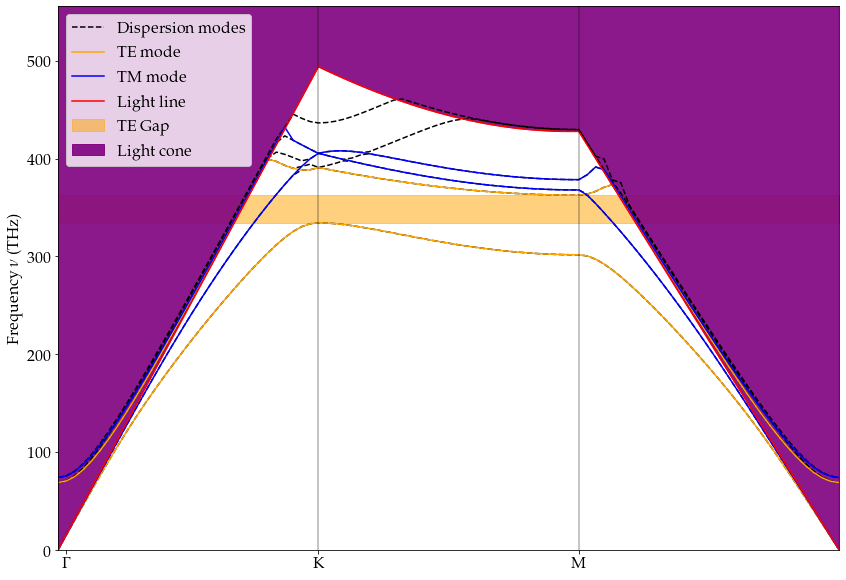

In [20]:
files = [f1,f2,f3]

fig, ax = hexagonal_lattice_bands(a* 1e-9, files) #because in nanometers

In [22]:
if save == True:
    fig.savefig('results/band_diagram_hexagonal_lattice.pdf')

In [24]:
f4 = np.genfromtxt(path+"/data/hole_hexagonal_lattice_bands_slope.dat", delimiter=",")[1:-1,1:]

In [25]:
fig, ax = plt.subplots(figsize=(14,10))

for i in range(1,7):
    
    if i == 1:
        ax.plot(np.linspace(0,len(f1[:,1])-1, len(f1[:,1])), f1[:,-i], c='black', linestyle='dashed', label = 'No  slope')
        ax.plot(np.linspace(0,len(f4[:,1])-1, len(f4[:,1])), f4[:,-i], c='red', linestyle='dashed', alpha=0.5, label = '7.9º  slope') 

    else:
        ax.plot(np.linspace(0,len(f1[:,1])-1, len(f1[:,1])), f1[:,-i], c='black', linestyle='dashed')
        if i > 6:
            continue
        ax.plot(np.linspace(0,len(f4[:,1])-1, len(f4[:,1])), f4[:,-i], c='red', alpha=0.5, linestyle='dashed') 


K_index = int(0.33*len(f1[:,1])) 
M_index = int(0.66*len(f1[:,1])) 
k_point = np.linspace(0,len(f1[:,1])-1, len(f1[:,1]))

k_till_K = np.array([np.linspace(0, 1/np.sqrt(3), K_index +1), np.linspace(0, 1/3,  K_index+1)])
k_till_M = np.array([1/np.sqrt(3)*np.ones(M_index - K_index ), np.linspace(1/3, 0,  M_index - K_index )])
k_till_Gamma = np.array([np.linspace(1/np.sqrt(3), 0, len(f1[:,1]) - M_index), np.zeros(len(f1[:,1]) - M_index)])

ax.fill_between(k_point, np.max(f2[:,-2])*np.ones_like(k_point), np.min(f2[K_index:M_index,-1])*np.ones_like(k_point), color='orange', alpha=0.5, label='TE Gap') 
ks = np.hstack([k_till_K,k_till_M[:,1:],k_till_Gamma])
Light_line = np.sqrt(ks[0,:]**2 + ks[1,:]**2)


ax.plot(k_point,  np.array(Light_line), c='r', label ='Light line')
ax.fill_between(k_point, Light_line, np.ones_like(k_point), color='purple', alpha=0.9, label='Light cone')


plt.axvline(x= K_index, c='black', alpha=0.3)
plt.axvline(x= M_index, c='black', alpha=0.3)


ax.set_xticks([1,  K_index, M_index, len(f1[:,1])])
ax.set_xticklabels(['$\\Gamma$', 'K', 'M','$\\Gamma$'])
ax.set_xlim([0,len(f1[:,1])-1])
ax.set_ylim([0,0.75])
ax.set_xlabel("")
ax.set_ylabel("Frequency $\omega a / 2 \pi c$")
ax.legend(loc=2)

In [26]:
if save == True:
    fig.savefig('results/band_diagram_hexagonal_lattice_slope_vs_no_slope.pdf')